In [1]:
# 在linux上面运行
import numpy as np
import cv2
import math
import matplotlib
import serial
import time
from Vision_Net import FastestDet
from matplotlib import pyplot as plt

#   git config --global user.email "rogrtssccot@gmail.com"
#   git config --global user.name "rogrtssccot"

In [2]:

# 获取并处理图像
def get_image():
    # 开全局变量处理，分理处红绿蓝
    global image, image_red, image_green, image_blue
    # 从摄像头获取图像
    image=cv2.imread('C:\Parallel_World\BaiduSyncdisk\My_World\Software_World\Python\Raspberry_Pi\Create_Race\Photo\ZCQ_WZ.jpg')
    image_red=image[:,:,2].astype(np.float32)
    image_green=image[:,:,1].astype(np.float32)
    image_blue=image[:,:,0].astype(np.float32)
    #cv2.imshow('image',image)
    #cv2.waitKey(1)

# 突出图像中的红色目标
def get_red():
    global image, image_red, image_green, image_blue
    image_red_only=image_red*2-image_blue-image_green
    image_red_only[image_red_only<0]=0
    return image_red_only

# 突出图像中的绿色目标
def get_green():
    global image, image_red, image_green, image_blue
    image_green_only=image_green*2-image_blue-image_red
    image_green_only[image_green_only<0]=0
    return image_green_only

# 突出图像中的蓝色目标
def get_blue():
    global image, image_red, image_green, image_blue
    image_blue_only=image_blue*2-image_blue-image_red
    image_blue_only[image_blue_only<0]=0
    return image_blue_only

# 突出目标颜色
def find_aim_color(aim_color):
    if aim_color == 'R':
        return get_red()
    if aim_color == 'G':
        return get_green()
    if aim_color == 'B':
        return get_blue()
    else:
        return get_blue()

# 展示图片
def show_image(image):
    image_show=image.astype(np.uint8)
    plt.imshow(image_show, cmap='gray')
    plt.axis('off')  # 不显示坐标轴
    plt.show()

# 在某一图像的指定位置添加图案
kernel = np.array([
[0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
[0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
[0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0],
[0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
[0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0],
[0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0],
[0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0],
[0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
[0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0],
[0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
[0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0],
])*255
def draw_image(image_gray_to_draw, kernel_point):
    try:
        image_gray_to_draw[int(kernel_point[0]-11):int(kernel_point[0]+11),int(kernel_point[1]-11):int(kernel_point[1]+11)]=kernel
    except:
        pass
    return image_gray_to_draw

In [3]:
get_image()

In [ ]:
photo=find_aim_color('G')
photo=(photo/np.max(photo))*255
show_image(photo)

In [5]:
from pyzbar import pyzbar
def decode_qr_code(QR_img):
    """
    识别二维码，对二维码进行编译，返回值
    :param code_img_path: 二维码的保存地址
    :return: 二维码的编译结果
    """
    return pyzbar.decode(QR_img, symbols=[pyzbar.ZBarSymbol.QRCODE])

In [ ]:
img=cv2.imread('C:\Parallel_World\BaiduSyncdisk\My_World\Software_World\Python\Raspberry_Pi\Create_Race\\213+231_phone.jpg')
results = decode_qr_code(img)
print("2、正在解码：")
if len(results):
    print("解码结果是：")
    print(results[0].data.decode("utf-8"))
else:
    print("无法识别")

In [ ]:
results=results[0].data.decode("utf-8")
QR1,QR2=results.split('+')
print(QR1,QR2)

In [ ]:
"""
生成二维码保存及对二维码解码输出
运行需要安装相应库
"""
import os
import qrcode
from PIL import Image
from pyzbar import pyzbar


def createQRCode1(content, save_path=None):
    """
    创建二维码图片，并保存
    :param content:二维码文本信息
    :param save_path:二维码保存地址
    :return:
    """

    qr = qrcode.QRCode(version=5, error_correction=qrcode.constants.ERROR_CORRECT_M, box_size=8, border=4)
    qr.add_data(data=content)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white")
    if save_path:
        img.save(save_path)
    else:
        img.show()


def createQRCode2(content, icon_path, save_path=None):
    """
    创建带中心图片的二维码，并保存
    :param content: 二维码文本信息
    :param icon_path: 中心图片地址
    :param save_path: 二维码保存地址
    :return: 无返回值
    """

    # 判断中心图片是否存在
    if not os.path.exists(icon_path):
        raise FileExistsError(icon_path)

    # 创建二维码图片
    qr = qrcode.QRCode(version=5, error_correction=qrcode.constants.ERROR_CORRECT_H, box_size=8, border=4)
    qr.add_data(data=content)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white").convert('RGBA')

    # 调整二维码图片
    icon_img = Image.open(icon_path)
    code_width, code_height = img.size
    icon_img = icon_img.resize(
        (code_width // 4, code_height // 4), Image.ANTIALIAS)

    img.paste(icon_img, (code_width * 3 // 8, code_width * 3 // 8))

    if save_path:
        img.save(save_path)  # 保存二维码图片
        img.show()  # 显示二维码图片
    else:
        print("save error!")


def decode_qr_code(code_img_path):
    """
    识别二维码，对二维码进行编译，返回值
    :param code_img_path: 二维码的保存地址
    :return: 二维码的编译结果
    """
    if not os.path.exists(code_img_path):
        raise FileExistsError(code_img_path)

    return pyzbar.decode(Image.open(code_img_path), symbols=[pyzbar.ZBarSymbol.QRCODE])


if __name__ == "__main__":
    print("============QRcodetest===============")
    print("         1、Make a QRcode            ")
    print("         2、Scan a QRcode            ")
    print("=====================================")
    print("1、请输入二维码存储信息：")
    code_Data = input('>>:').strip()
    print("正在编码·······")

    # createQRCode2(code_Data, "img/QRcenter.jpg", "qrcode.png")  # 内容，center图片，生成二维码图片
    createQRCode1(code_Data, "qrcode.png")
    print("图片已保存，名称为：qrcode.png")
    results = decode_qr_code("qrcode.png")
    print("2、正在解码：")
    if len(results):
        print("解码结果是：")
        print(results[0].data.decode("utf-8"))
    else:
        print("无法识别")


In [ ]:
PBL='LWLQ1'
PBL[0:4]=='LWLQ'
i=2
str(i+1)

In [ ]:
import numpy as np  
  
# 假设你有以下坐标点  
x = np.array([1, 2, 3, 4, 5])  
y = np.array([2, 3, 5, 7, 11])  

xy=[(1,2),(2,3),(3,5),(4,7),(5,11)]

# 使用numpy的polyfit计算线性回归，1表示多项式的度数为1（即线性）  
coefficients = np.polyfit(x, y, 1)
  
# coefficients中的第一个元素是斜率，第二个元素是截距  
slope = coefficients[0]  
intercept = coefficients[1]  
  
print(f"斜率: {slope}, 截距: {intercept}")

In [ ]:
def order_deal(order_temp):
    order_temp=min(max(-999,order_temp),999)
    if order_temp>=0:
        error='+'+str(int(int(order_temp)%1000/100))+str(int(int(order_temp)%100/10))+str(int(order_temp)%10)
    if order_temp<0:
        error='-'+str(int(int((-order_temp))%1000/100))+str(int(int((-order_temp))%100/10))+str(int((-order_temp))%10)
    return error

X_CJQ,Y_CJQ,K_CJG=23,-13.1,-330
'K'+order_deal(K_CJG)+'X'+order_deal(X_CJQ)+'Y'+order_deal(Y_CJQ)

In [1]:
# 找到位置
def get_position():
    # 分别返回目标的行列
    position_XY=0,0
    print('get_position函数未完善')
    return position_XY

In [ ]:
# 判断在物料区当前视角中是否有是目标物料
def Judge_WLQ_material(aim_image,aim_color):
    print('Judge_WLQ_material函数未完善')
    return 0

In [25]:
# this part we need find the center of every circle
# import the image
get_image()

In [ ]:
get_image()
image_red1=get_red()
image_green1=get_green()
image_blue1=get_blue()
show_image(image_red1)

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
 
src = image_red1
img = src.copy()
img_gray = img
 
# 进行中值滤波
dst_img = img_gray
 
# 霍夫圆检测
circle = cv.HoughCircles(dst_img, cv.HOUGH_GRADIENT, 1, 50,
                         param1=100, param2=100, minRadius=0, maxRadius=10000)
 
print(circle)

In [ ]:
# this function need judge the material is in the aim_image or not
# show_image(image_red1)
show_image(dst_img)

In [68]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
 
src = cv.imread('C:\Parallel_World\BaiduSyncdisk\My_World\Software_World\Python\Raspberry_Pi\Create_Race\Photo\ZCQ_WZ.jpg')
img = src.copy()
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 进行中值滤波
# dst_img = cv.medianBlur(img_gray, 7)
dst_img = img_gray

# 霍夫圆检测
circle = cv.HoughCircles(dst_img, cv.HOUGH_GRADIENT, 1, 150,
                         param1=100, param2=100, minRadius=0, maxRadius=10000)
print(circle)

[[[1290.5  630.5  284.5]
  [ 928.5  463.5  100. ]
  [1404.5  462.5  117.8]
  [1482.5  641.5  136.7]
  [ 495.5  479.5  100.9]
  [1508.5  947.5  290.2]
  [1119.5  616.5  237.9]
  [1616.5 1323.5  109.9]
  [1605.5  791.5  114.3]
  [1707.5  603.5  165.5]
  [1356.5  767.5   60.5]]]


100.0
100.9
109.9


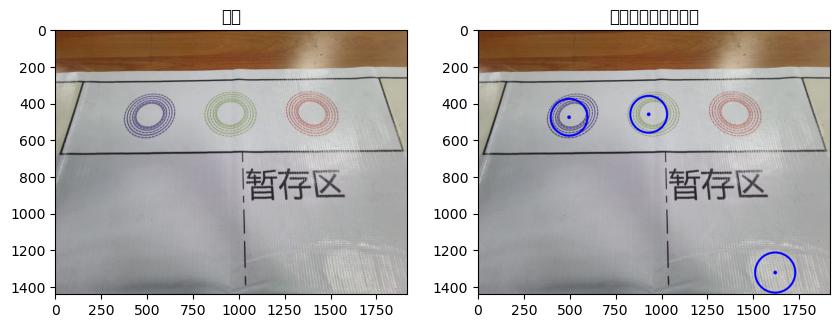

In [69]:
# 将检测结果绘制在图像上
for i in circle[0, :]:  # 遍历矩阵的每一行的数据
    if (i[2] > 80)&(i[2] < 110):
        print(i[2])
        # 绘制圆形
        cv.circle(img, (int(i[0]), int(i[1])), int(i[2]), (255, 0, 0), 10)
        # 绘制圆心
        cv.circle(img, (int(i[0]), int(i[1])), 10, (255, 0, 0), -1)

# 显示图像
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), dpi=100)
axes[0].imshow(src[:, :, ::-1])
axes[0].set_title("原图")
axes[1].imshow(img[:, :, ::-1])
axes[1].set_title("霍夫圆检测后的图像")
plt.show()

In [87]:
capture=cv2.VideoCapture(1)
# 拍照，保存一张照片
def take_photo(photo_name):
    global capture
    photo_name=photo_name+'.jpg'
    _,image=capture.read()
    cv2.imwrite(photo_name,image)
    print('take photo success')

In [9]:
s=0

In [211]:
take_photo(f'{s}')
s=s+1

take photo success
